In [1]:
!pip install wget

In [2]:
!rm *.py.1
!rm *.py

In [1]:
!wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA5%20S8/dataloaders.py
!wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA5%20S8/misc.py
!wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA5%20S8/resnet.py
!wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA5%20S8/testing.py
!wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA5%20S8/training.py
!wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA5%20S8/training.py

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [5]:
def calc_rf(jin, k, rin):
    rout = rin + ((k-1) * jin)
    return rout

calc_rf(8,1,84)

84

In [6]:
from resnet import ResNet18
import training
import reg_tech
import testing
import dataloaders

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

net = ResNet18() 




classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
from resnet import ResNet18
from torchsummary import summary

net= ResNet18()

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = net.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [8]:
train_losses = []
test_losses = []

In [9]:
batch_size = 128
train_loader, test_loader, sample_loader = dataloaders.data_loaders(batch_size)
optimizer= reg_tech.hi_optimizer(model)

Files already downloaded and verified
Files already downloaded and verified


 deer   car horse   dog


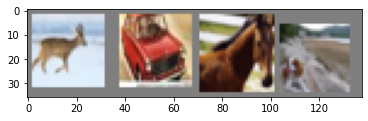

In [10]:
import misc

misc.show_images(sample_loader, classes)

In [11]:
for epoch in range(1, 35):
    training.train(model, device, train_loader, optimizer, epoch)
    test_loss = testing.test(model, device, test_loader)
    print('Epoch-{0} lr: {1}'.format(epoch, optimizer.param_groups[0]['lr']))

Loss=1.2251591682434082 Batch_id=390 Accuracy=40.42: 100%|██████████| 391/391 [01:01<00:00,  6.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 4930/10000 (49.30%)

Epoch-1 lr: 0.001


Loss=0.9915614128112793 Batch_id=390 Accuracy=56.22: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 5974/10000 (59.74%)

Epoch-2 lr: 0.001


Loss=0.8391397595405579 Batch_id=390 Accuracy=64.30: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 6258/10000 (62.58%)

Epoch-3 lr: 0.001


Loss=0.7481454610824585 Batch_id=390 Accuracy=69.77: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6781/10000 (67.81%)

Epoch-4 lr: 0.001


Loss=0.8105063438415527 Batch_id=390 Accuracy=73.84: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7273/10000 (72.73%)

Epoch-5 lr: 0.001


Loss=0.7676012516021729 Batch_id=390 Accuracy=76.48: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7130/10000 (71.30%)

Epoch-6 lr: 0.001


Loss=0.5484565496444702 Batch_id=390 Accuracy=79.03: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7699/10000 (76.99%)

Epoch-7 lr: 0.001


Loss=0.5061217546463013 Batch_id=390 Accuracy=80.77: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7931/10000 (79.31%)

Epoch-8 lr: 0.001


Loss=0.6547433733940125 Batch_id=390 Accuracy=81.96: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 7973/10000 (79.73%)

Epoch-9 lr: 0.001


Loss=0.5164247751235962 Batch_id=390 Accuracy=83.27: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8064/10000 (80.64%)

Epoch-10 lr: 0.001


Loss=0.674303412437439 Batch_id=390 Accuracy=84.18: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8075/10000 (80.75%)

Epoch-11 lr: 0.001


Loss=0.32955679297447205 Batch_id=390 Accuracy=85.21: 100%|██████████| 391/391 [01:07<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8193/10000 (81.93%)

Epoch-12 lr: 0.001


Loss=0.41815653443336487 Batch_id=390 Accuracy=86.10: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8303/10000 (83.03%)

Epoch-13 lr: 0.001


Loss=0.2561190724372864 Batch_id=390 Accuracy=87.07: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8186/10000 (81.86%)

Epoch-14 lr: 0.001


Loss=0.32615798711776733 Batch_id=390 Accuracy=87.43: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8333/10000 (83.33%)

Epoch-15 lr: 0.001


Loss=0.4202306866645813 Batch_id=390 Accuracy=88.31: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8314/10000 (83.14%)

Epoch-16 lr: 0.001


Loss=0.4006398320198059 Batch_id=390 Accuracy=88.87: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8433/10000 (84.33%)

Epoch-17 lr: 0.001


Loss=0.2751050591468811 Batch_id=390 Accuracy=89.20: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8353/10000 (83.53%)

Epoch-18 lr: 0.001


Loss=0.2652944028377533 Batch_id=390 Accuracy=89.75: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8513/10000 (85.13%)

Epoch-19 lr: 0.001


Loss=0.17348691821098328 Batch_id=390 Accuracy=90.02: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8473/10000 (84.73%)

Epoch-20 lr: 0.001


Loss=0.14096610248088837 Batch_id=390 Accuracy=90.90: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8572/10000 (85.72%)

Epoch-21 lr: 0.001


Loss=0.2509916424751282 Batch_id=390 Accuracy=91.10: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8436/10000 (84.36%)

Epoch-22 lr: 0.001


Loss=0.3531436324119568 Batch_id=390 Accuracy=91.77: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8456/10000 (84.56%)

Epoch-23 lr: 0.001


Loss=0.15073157846927643 Batch_id=390 Accuracy=91.88: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8621/10000 (86.21%)

Epoch-24 lr: 0.001


Loss=0.08189753443002701 Batch_id=390 Accuracy=92.39: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8373/10000 (83.73%)

Epoch-25 lr: 0.001


Loss=0.40036892890930176 Batch_id=390 Accuracy=92.52: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8534/10000 (85.34%)

Epoch-26 lr: 0.001


Loss=0.19196951389312744 Batch_id=390 Accuracy=93.03: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8564/10000 (85.64%)

Epoch-27 lr: 0.001


Loss=0.16598406434059143 Batch_id=390 Accuracy=93.34: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8653/10000 (86.53%)

Epoch-28 lr: 0.001


Loss=0.18571527302265167 Batch_id=390 Accuracy=93.59: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8680/10000 (86.80%)

Epoch-29 lr: 0.001


Loss=0.21940772235393524 Batch_id=390 Accuracy=94.01: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8709/10000 (87.09%)

Epoch-30 lr: 0.001


Loss=0.1571517139673233 Batch_id=390 Accuracy=94.06: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8617/10000 (86.17%)

Epoch-31 lr: 0.001


Loss=0.22217711806297302 Batch_id=390 Accuracy=94.32: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8728/10000 (87.28%)

Epoch-32 lr: 0.001


Loss=0.05545438081026077 Batch_id=390 Accuracy=94.52: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8612/10000 (86.12%)

Epoch-33 lr: 0.001


Loss=0.13505691289901733 Batch_id=390 Accuracy=94.87: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]



Test set: Average loss: 0.0033, Accuracy: 8707/10000 (87.07%)

Epoch-34 lr: 0.001
